In [111]:
###############################
### VISUALISING CNN FILTERS ###
###############################

#Import dependencies
import numpy as np 
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math

# Load mnist data from local
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Specify shape for X and Y
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 784],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")


# Network structure 3 layers no pooling row filter and column filter
x_image = tf.reshape(x,[-1,28,28,1])
#hidden_1 = slim.conv2d(x_image,1,[5,12])
hidden_1 = tf.layers.conv2d(activation=tf.nn.relu, 
                                filters=1, 
                                inputs=x_image, 
                                kernel_size=(1, 14), 
                                name="conv1",         # NOTE THE NAME 
                                padding="same", 
                                strides=(14, 14))
#pool_1 = slim.max_pool2d(hidden_1,[2,2])
#hidden_2 = slim.conv2d(hidden_1,5,[12,3])
hidden_2 = tf.layers.conv2d(activation=tf.nn.relu, 
                                filters=1, 
                                inputs=x_image, 
                                kernel_size=(14, 1), 
                                name="conv2",         # NOTE THE NAME 
                                padding="same", 
                                strides=(14, 14))

#pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(hidden_2,20,[5,5])
out_y = slim.fully_connected(slim.flatten(hidden_3),10,activation_fn=tf.nn.softmax)

# Train
cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [112]:
# Train
batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))

step 100, training accuracy 0.16
step 200, training accuracy 0.22
step 300, training accuracy 0.06
step 400, training accuracy 0.2
step 500, training accuracy 0.18
step 600, training accuracy 0.16
step 700, training accuracy 0.08
step 800, training accuracy 0.12
step 900, training accuracy 0.1
step 1000, training accuracy 0.2


In [113]:
#testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:mnist.test.labels, keep_prob:1.0})
#print("test accuracy %g"%(testAccuracy))

In [114]:
## 1. Visualizing for a given image the filters that were activated

# Function to get activations for given input image
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)

def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

In [104]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

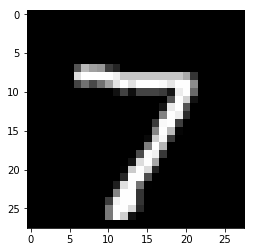

In [115]:
# Testing with image from data
imageToUse = mnist.test.images[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

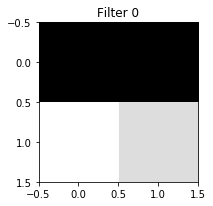

In [116]:
getActivations(hidden_1,imageToUse)

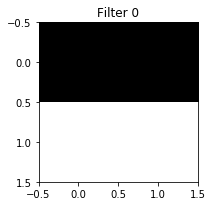

In [117]:
getActivations(hidden_2,imageToUse)

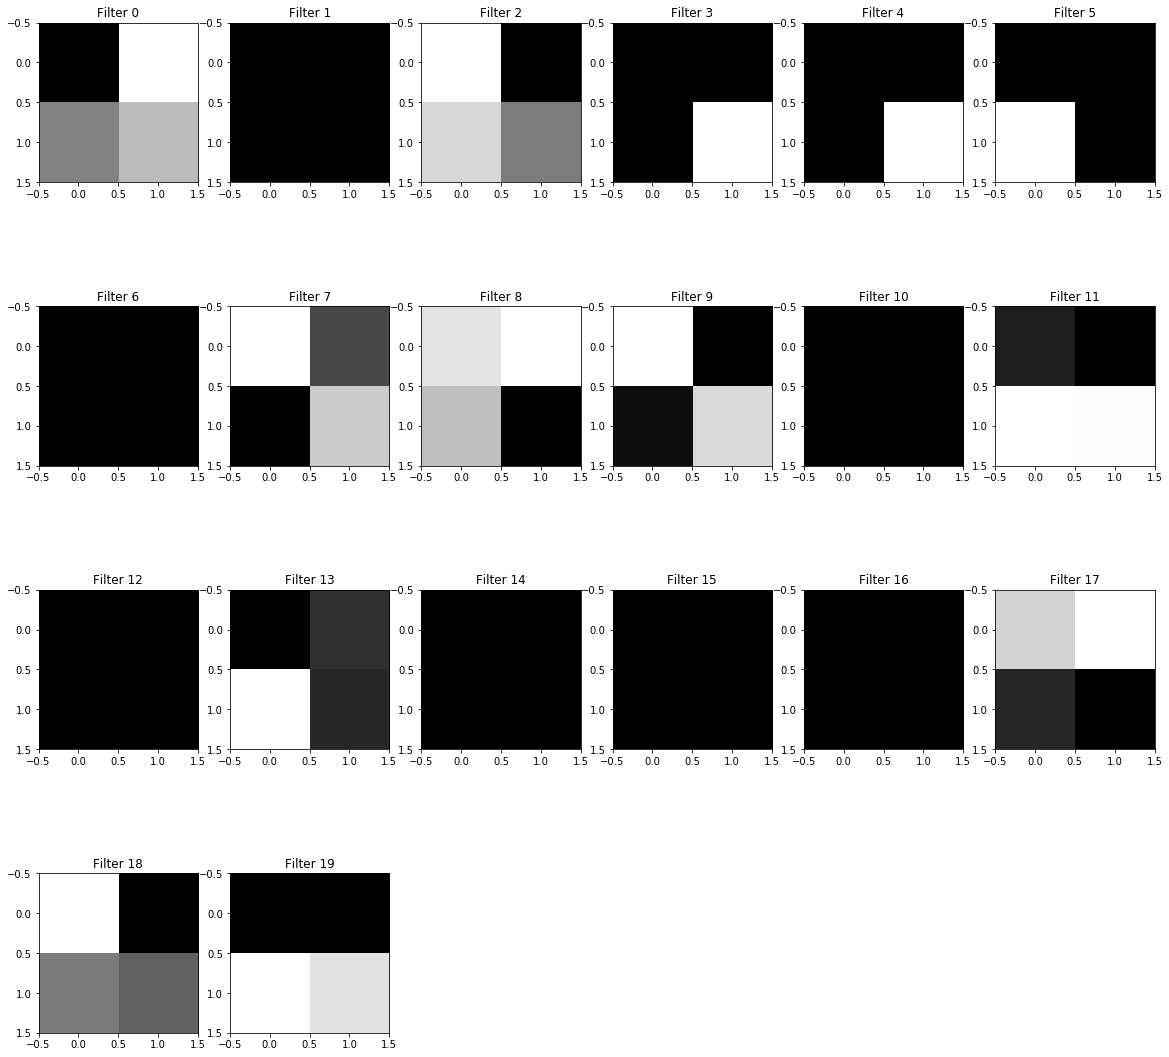

In [119]:
getActivations(hidden_3,imageToUse)

Filter in layer 1


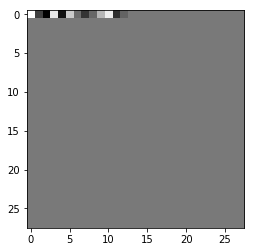

In [136]:
## 2. Printing image of kernels learnt 

# Kernal in layer 1
gr = tf.get_default_graph()
conv1_kernel_val = gr.get_tensor_by_name('conv1/kernel:0').eval(session=sess)
k1 = conv1_kernel_val
ffilter = np.zeros((28,28))


for i in range(1):
    for j in range(13):
        ffilter[i,j]=k1[i,j,0,0]
        
print("Filter in layer 1")
plt.imshow(ffilter, interpolation="nearest", cmap="gray")

Filter in layer 2


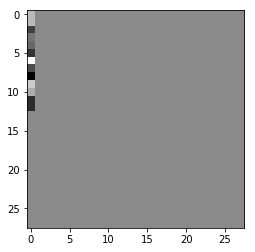

In [137]:
# Kernel in layer 2
gr = tf.get_default_graph()
conv2_kernel_val = gr.get_tensor_by_name('conv2/kernel:0').eval(session=sess)

k2 = conv2_kernel_val
sfilter = np.zeros((28,28))

for i in range(13):
    for j in range(1):
        sfilter[i,j]=k2[i,j,0,0]
        
print("Filter in layer 2")
plt.imshow(sfilter, interpolation="nearest", cmap="gray")